<a href="https://colab.research.google.com/github/priyamvadadaga/edav/blob/main/AML_HW4_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

1) Please submit the .ipynb and .pdf file to gradescope

2) Please include your Name and UNI below.

### Name: Priyamvada Daga
### UNI:  psd2127

## Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
pp = pprint.PrettyPrinter(indent=4)
import warnings
warnings.filterwarnings("ignore")

# Part 1: Neural Network from the scratch
For this part, you are not allowed to use any library other than numpy.

In this part, you will implement the forward pass and backward pass (i.e. the derivates of each
parameter wrt to the loss) with the network image uploaded.

*   The weight matrix for the hidden layer is W1 and has bias b1.
*   The weight matrix for the output layer is W2 and has bias b2.
*   Activation function is sigmoid for both hidden and output layer
*   Loss function is the Mean Squared Error (MSE) loss

Refer to the below dictionary for dimensions for each matrix


In [ ]:
np.random.seed(0) # don't change this
weights = {
'W1': np.random.randn(3, 2),
'b1': np.zeros(3),
'W2': np.random.randn(3),
'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [ ]:
#Sigmoid Function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [ ]:
#Implement the forward pass - Z2 and Y
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation

    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)

    Z2 = np.dot(H, weights['W2'].T)  + weights['b2']
    Y = sigmoid(Z2)

    return Y, Z2, H, Z1

In [ ]:
# Implement the backward pass - dLdZ1, dLdW1, dLdb1
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]

    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))

    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)

    ones = np.ones((1000))
    dLdb2 = np.dot(ones.T, dLdZ2)
    dLdH = np.dot(dLdZ2.reshape(-1,1), weights['W2'].reshape(-1,1).T)

    dLdZ1 = np.multiply(dLdH, (sigmoid(Z1)*(1-sigmoid(Z1))))
    dLdW1 = np.dot(X.T, dLdZ1)
    dLdb1 = np.dot(ones.T, dLdZ1)

    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }

    return gradients, L

In [ ]:
gradients, L = back_propagation(X, Y, weights)
print(L)

0.1332476222330792


In [ ]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596, -0.00030765, -0.00034768],
       [ 0.00262019, -0.00024188, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': 0.029249230265318685}


Your answers should be close to L = 0.133 and 'b1': array([ 0.00492, -0.000581, -0.00066]).

You will be graded based on your implementation and outputs for L, W1, W2 b1, and b2

# Part 2: Neural network to classify images: CIFAR-10

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes - airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

The train/test split is 50k/10k.

In [ ]:
from tensorflow.keras.datasets import cifar10 #Code to load data, do not change
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()

LABELS = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


### 2.1 Plot 50 samples from each class/label from train set on a 10*5 subplot

In [ ]:
images_labelled = {label: [] for label in range(len(LABELS))}

for img, label in zip(x_dev, y_dev.flatten()):
    if len(images_labelled[label]) < 5:
        images_labelled[label].append(img)
    if all(len(images_labelled[l]) == 5 for l in images_labelled):
        break

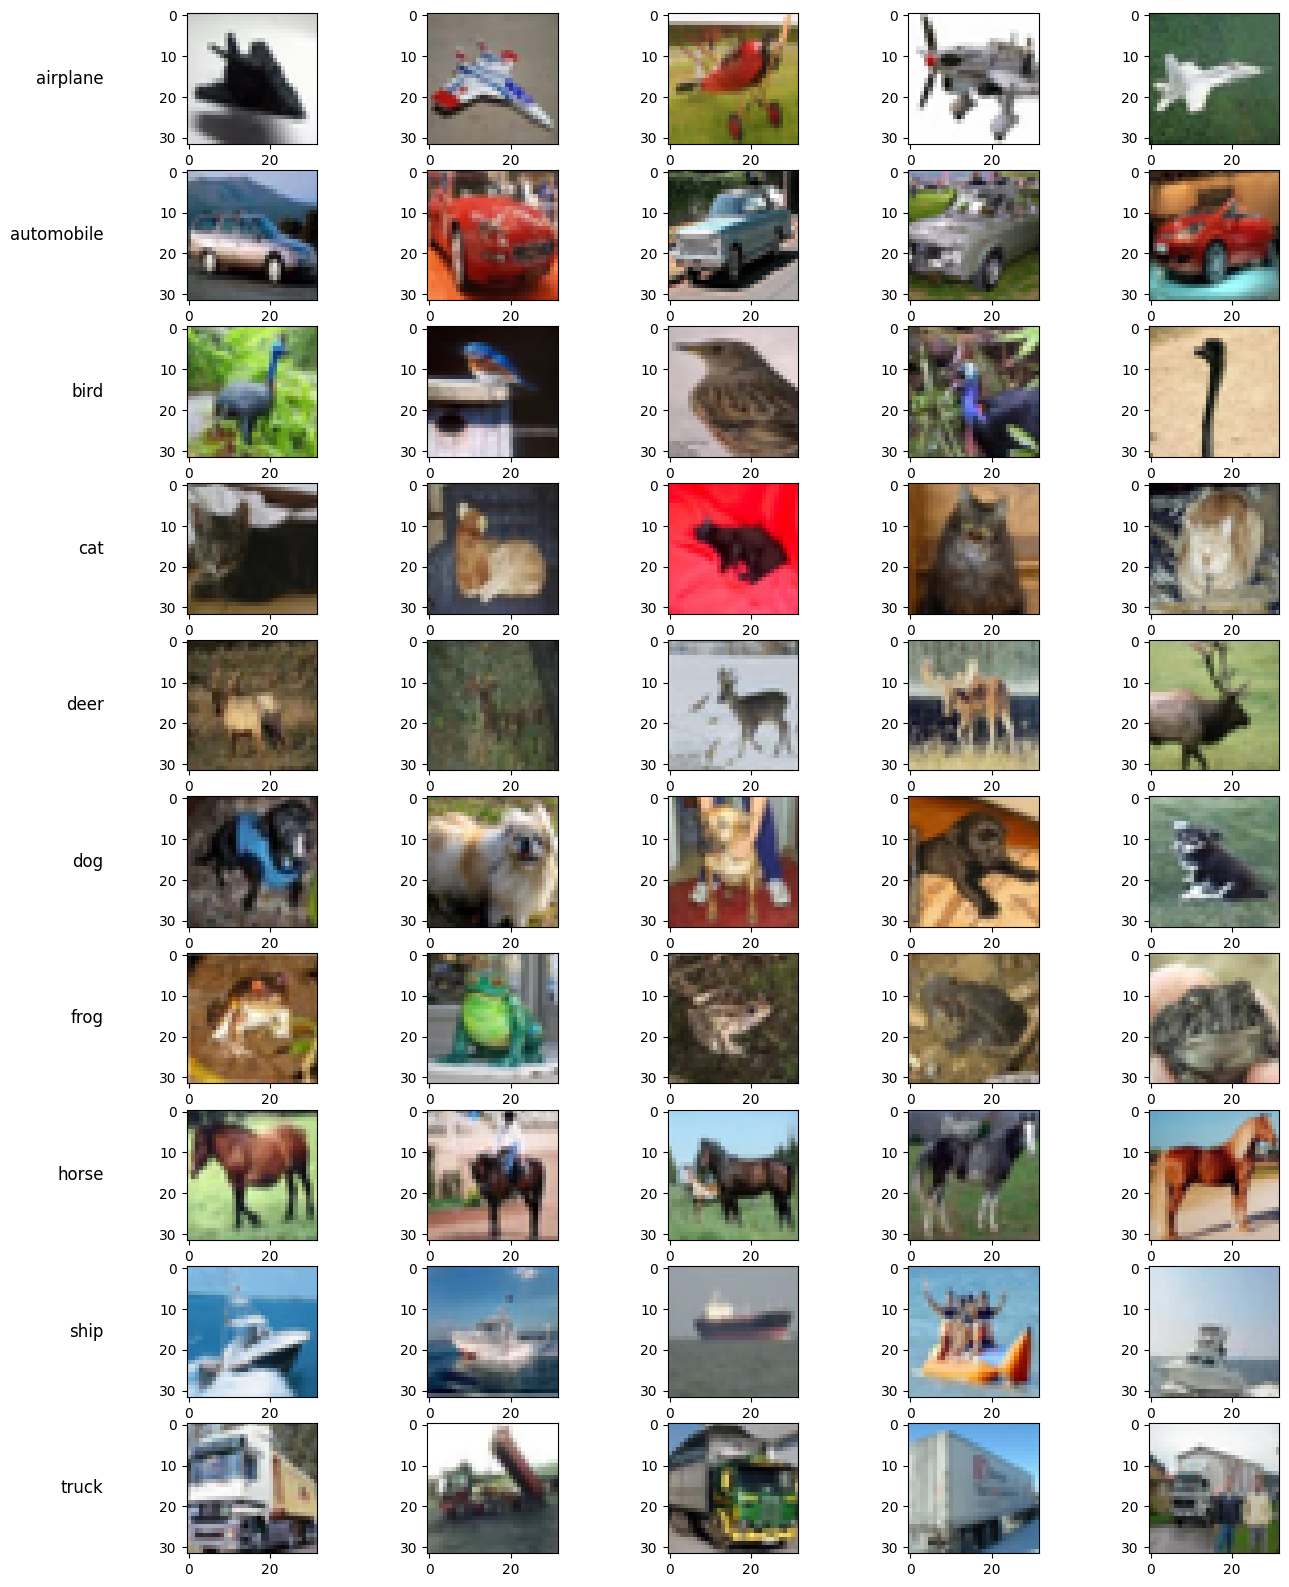

In [ ]:
fig, axes = plt.subplots(10, 5, figsize=(15, 20))
for row, (label, images) in enumerate(images_labelled.items()):
    for col in range(5):
        axes[row, col].imshow(images[col])
    axes[row, 0].set_ylabel(LABELS[label], rotation=0, labelpad=40, ha='right', va='center', fontsize=12)
plt.show()

###2.2 Preparing the dataset for NN

1) Print the shapes -  𝑥𝑑𝑒𝑣, 𝑦𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡, 𝑦𝑡𝑒𝑠𝑡

2) Flatten the images into one-dimensional vectors and again print the shapes of  𝑥𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡

3) Standardize the development and test sets.

4) One hot encode your labels

5) Train-test split your development set into train and validation sets (80:20 ratio).

In [ ]:
#Your code here
print(x_dev.shape)
print(y_dev.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
#Your code here
x_dev_flat = x_dev.reshape(x_dev.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)
print(x_dev_flat.shape)
print(x_test_flat.shape)

(50000, 3072)
(10000, 3072)


In [ ]:
x_dev_scaled = x_dev_flat.astype('float32') / 255.0
x_test_scaled = x_test_flat.astype('float32') / 255.0

In [ ]:
#Your code here
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y_dev_ohe = ohe.fit_transform(y_dev).toarray()
y_test_ohe = ohe.transform(y_test).toarray()

In [ ]:
#Your code here
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_dev_scaled, y_dev_ohe, test_size=0.2, random_state=42)

### 2.3 Build the feed forward network with the below specifications

First layer size = 128

hidden layer size = 64

last layer size = Figure this out from the data!

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(LABELS), activation='softmax'))

### 2.4 Print out the model summary. Mention the number of parameters for each layer.

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

### 2.5 Do you think the number of parameters is dependent on the image height and width?

In [ ]:
# Yes, in this model, the number of parameters in the FIRST layer is indirectly influenced by the image's height and width. Since the input layer expects a flattened feature vector, the total number of features is height * width * depth. However, this is only true of the FIRST layer, since the input size of future layers is pre-defined by the output size of previous layers.

**Printing out your model's output on first train sample. This will confirm if your dimensions are correctly set up. The sum of this output should equal to 1.**

In [ ]:
model.compile()
output = model.predict(X_train[0].reshape(1,-1))

print("Output: {:.2f}".format(sum(output[0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
Output: 1.00


### 2.6 Using the right metric and  the right loss function, with Adam as the optimizer, train your model for 20 epochs.

In [ ]:
#Your code here
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_val, y_val))

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2641 - loss: 2.0215 - val_accuracy: 0.3528 - val_loss: 1.7922
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3720 - loss: 1.7491 - val_accuracy: 0.3963 - val_loss: 1.6859
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4049 - loss: 1.6640 - val_accuracy: 0.3924 - val_loss: 1.6960
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4224 - loss: 1.6184 - val_accuracy: 0.4262 - val_loss: 1.5936
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4246 - loss: 1.5942 - val_accuracy: 0.4192 - val_loss: 1.6287
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4437 - loss: 1.5637 - val_accuracy: 0.4129 - val_loss: 1.6359
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4465 - loss: 1.5467 - val_accuracy: 0.4308 - val_loss: 1.5937
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4519 - loss: 1.5278 -

### 2.7 Plot the training curves as described below

#### 2.7.1 Display the train vs validation loss over each epoch


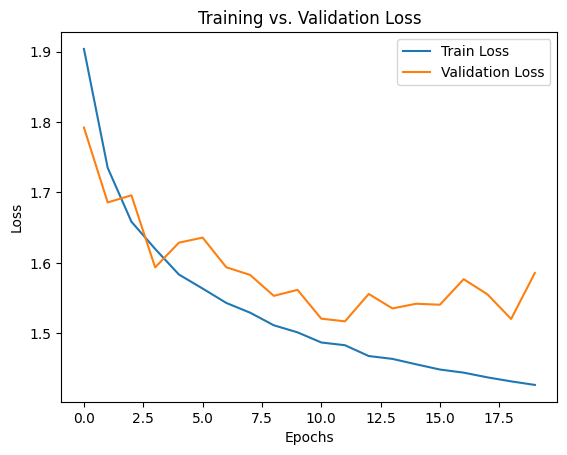

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()

#### 2.7.2 Display the train vs validation accuracy over each epoch

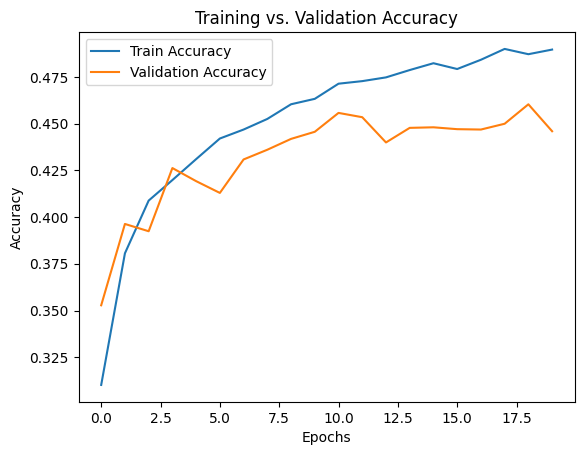

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.show()

### 2.8 Finally, report the metric chosen on test set

In [ ]:
#Your code here
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_ohe, verbose=1)
print(test_loss)
print(test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4498 - loss: 1.5705
1.5770375728607178
0.44920000433921814


### 2.9 Plot the first 50 samples of test dataset on a 10*5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). (Make sure you predict the class with the improved model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


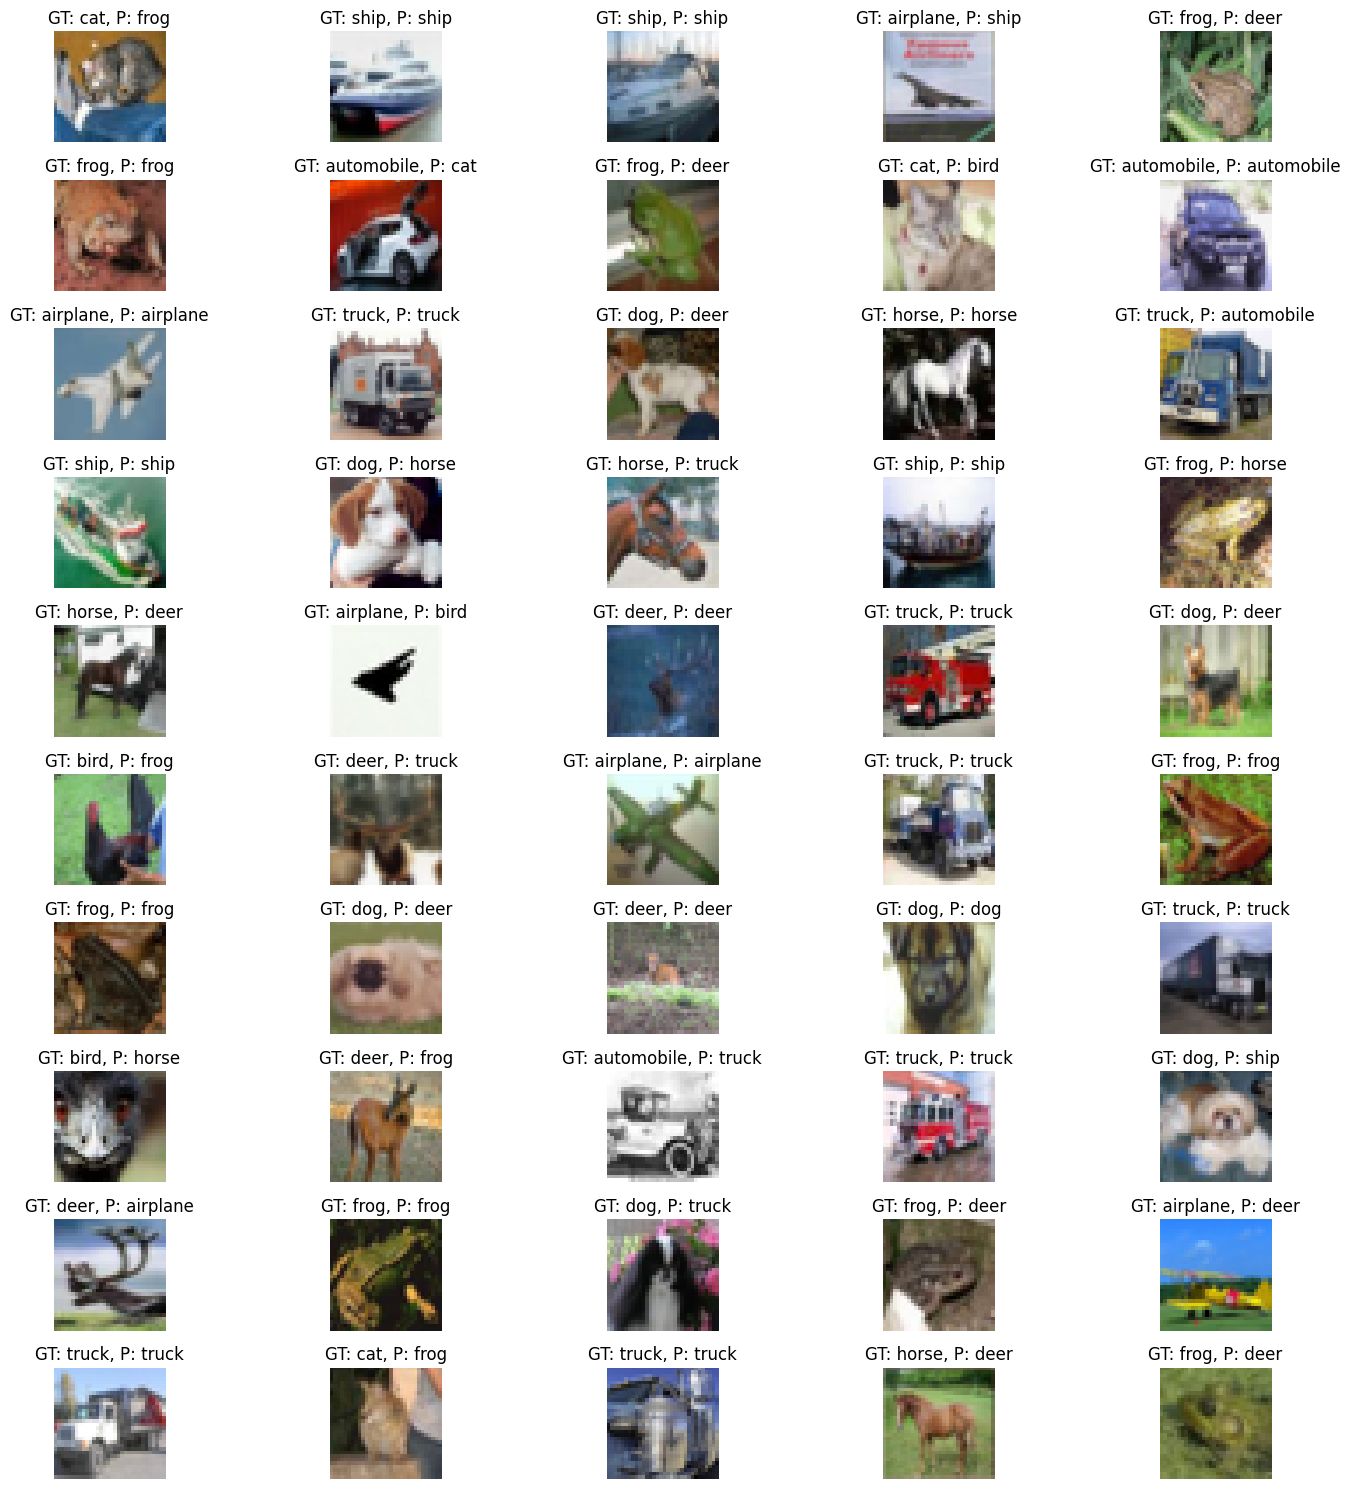

In [ ]:
y_test_labels = ohe.inverse_transform(y_test_ohe)
y_pred = model.predict(x_test_scaled)
y_pred_class = np.argmax(y_pred, axis=1)

plt.figure(figsize=(15, 15))
for i in range(50):
    plt.subplot(10, 5, i + 1)
    plt.imshow(x_test[i])
    gt_label = LABELS[y_test_labels[i][0]]
    pred_label = LABELS[y_pred_class[i]]
    plt.title(f"GT: {gt_label}, P: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Part 3 - Convolutional Neural Networks

In this part of the homework, we will build and train a classical convolutional neural network on the CIFAR Dataset

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [ ]:
#Code to load the dataset - Do not change
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()
print("x_dev: {},y_dev: {},x_test: {},y_test: {}".format(x_dev.shape, y_dev.shape, x_test.shape, y_test.shape))

x_dev, x_test = x_dev.astype('float32'), x_test.astype('float32')
x_dev = x_dev/255.0
x_test = x_test/255.0


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_dev, y_dev,test_size = 0.2, random_state = 42)

x_dev: (50000, 32, 32, 3),y_dev: (50000, 1),x_test: (10000, 32, 32, 3),y_test: (10000, 1)


In [ ]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

### 3.1 We will be implementing one of the first CNN models put forward by Yann LeCunn, which is commonly referred to as LeNet-5. The network has the following layers:

1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 and padded to yield the same size as input, ReLU activation

2) Maxpooling layer of 2x2

3) 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation

4) Maxpooling layer of 2x2

5) Flatten the convolution output to feed it into fully connected layers

6) A fully connected layer with 120 units, ReLU activation

7) A fully connected layer with 84 units, ReLU activation

8) The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)

In [ ]:
LeNet5 = Sequential()
LeNet5.add(Conv2D(6, (5, 5), strides=1, padding='same', activation='relu', input_shape=x_dev.shape[1:]))
LeNet5.add(MaxPool2D(pool_size=(2, 2)))
LeNet5.add(Conv2D(16, (5, 5), strides=1, padding='valid', activation='relu')) # (?) zero padding is valid
LeNet5.add(MaxPool2D(pool_size=(2, 2)))
LeNet5.add(Flatten())
LeNet5.add(Dense(120, activation='relu'))
LeNet5.add(Dense(84, activation='relu'))
LeNet5.add(Dense(y_train.shape[1], activation='softmax'))

### 3.2 Report the model summary

In [ ]:
LeNet5.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          69,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,126 (324.71 KB)

 Trainable params: 83,126 (324.71 KB)

 Non-trainable params: 0 (0.00 B)

### 3.3 Model Training

1) Train the model for 20 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets.

2) Plot separate plots for:

* displaying train vs validation loss over each epoch
* displaying train vs validation accuracy over each epoch

3) Report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [ ]:
LeNet5.compile(loss='categorical_crossentropy', metrics=['accuracy'])
le_history = LeNet5.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_val, y_val))

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3262 - loss: 1.8469 - val_accuracy: 0.4883 - val_loss: 1.4319
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5095 - loss: 1.3719 - val_accuracy: 0.5611 - val_loss: 1.2507
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5628 - loss: 1.2269 - val_accuracy: 0.5604 - val_loss: 1.2373
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6071 - loss: 1.1090 - val_accuracy: 0.6011 - val_loss: 1.1407
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6375 - loss: 1.0347 - val_accuracy: 0.5890 - val_loss: 1.1849
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6525 - loss: 0.9845 - val_accuracy: 0.6166 - val_loss: 1.1084
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6776 - loss: 0.9179 - val_accuracy: 0.6226 - val_loss: 1.1033
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6960 - loss: 0.8688 - 

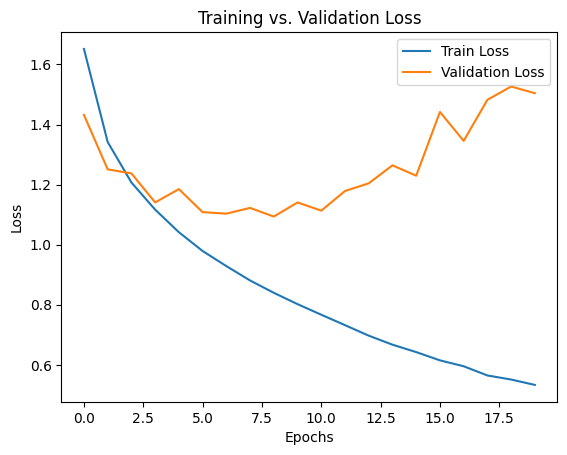

In [ ]:
plt.plot(le_history.history['loss'], label='Train Loss')
plt.plot(le_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()

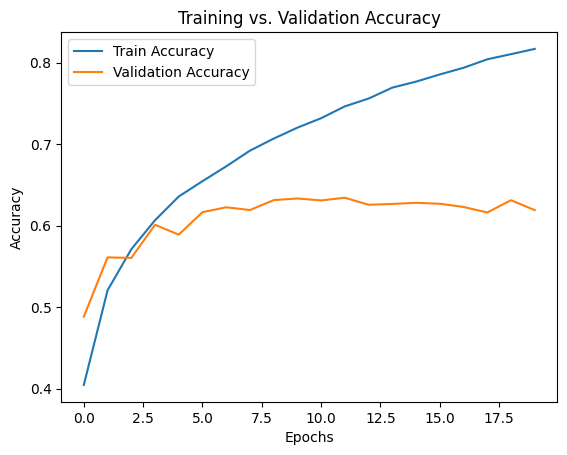

In [ ]:
plt.plot(le_history.history['accuracy'], label='Train Accuracy')
plt.plot(le_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = LeNet5.evaluate(x_test, y_test, verbose=1)
print(test_loss)
print(test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6167 - loss: 1.5532
1.5162794589996338
0.6202999949455261


### 3.4 Overfitting
1) To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.3. Train the model again for 20 epochs. Report model performance on test set.

Plot separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch

2) This time, let's apply a batch normalization after every hidden layer, train the model for 20 epochs, report model performance on test set as above.

Plot separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch

3) Compare batch normalization technique with the original model and with dropout, which technique do you think helps with overfitting better?

#### 3.4.1 Dropout

In [ ]:
#Your code here
from tensorflow.keras.layers import Dropout

LeNet5 = Sequential()
LeNet5.add(Conv2D(6, (5, 5), strides=1, padding='same', activation='relu', input_shape=x_dev.shape[1:]))
LeNet5.add(MaxPool2D(pool_size=(2, 2)))
LeNet5.add(Conv2D(16, (5, 5), strides=1, padding='valid', activation='relu'))
LeNet5.add(MaxPool2D(pool_size=(2, 2)))
LeNet5.add(Flatten())
LeNet5.add(Dense(120, activation='relu'))
LeNet5.add(Dropout(0.3))
LeNet5.add(Dense(84, activation='relu'))
LeNet5.add(Dropout(0.3))
LeNet5.add(Dense(y_train.shape[1], activation='softmax'))

LeNet5.compile(loss='categorical_crossentropy', metrics=['accuracy'])
le_history = LeNet5.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_val, y_val))

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2645 - loss: 1.9840 - val_accuracy: 0.4459 - val_loss: 1.5398
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4504 - loss: 1.5148 - val_accuracy: 0.5039 - val_loss: 1.3856
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5166 - loss: 1.3704 - val_accuracy: 0.5230 - val_loss: 1.3482
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5452 - loss: 1.2885 - val_accuracy: 0.5770 - val_loss: 1.1899
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5695 - loss: 1.2337 - val_accuracy: 0.5832 - val_loss: 1.1865
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5861 - loss: 1.1948 - val_accuracy: 0.6039 - val_loss: 1.1302
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6015 - loss: 1.1528 - val_accuracy: 0.5988 - val_loss: 1.1473
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6140 - loss: 1.1361 - 

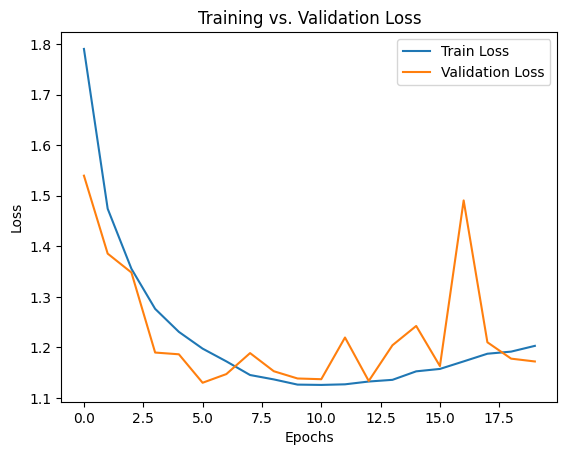

In [ ]:
#Your code here
plt.plot(le_history.history['loss'], label='Train Loss')
plt.plot(le_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()

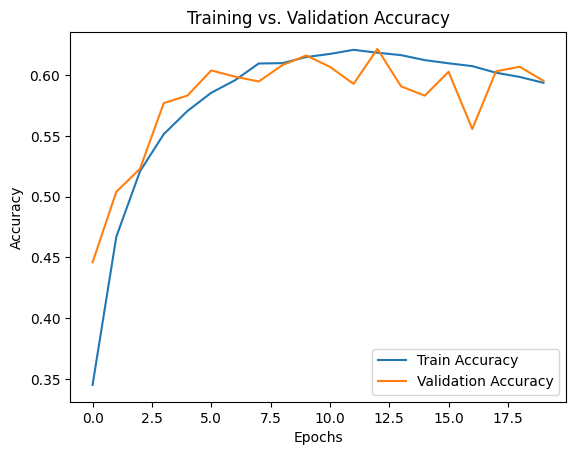

In [ ]:
#Your code here
plt.plot(le_history.history['accuracy'], label='Train Accuracy')
plt.plot(le_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = LeNet5.evaluate(x_test, y_test, verbose=1)
print(test_loss)
print(test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6042 - loss: 1.1504
1.1588058471679688
0.6007999777793884


#### 3.4.2 Batch Normalization

In [ ]:
#Your code here
from tensorflow.keras.layers import BatchNormalization

LeNet5 = Sequential()
LeNet5.add(Conv2D(6, (5, 5), strides=1, padding='same', activation='relu', input_shape=x_dev.shape[1:]))
LeNet5.add(BatchNormalization())
LeNet5.add(MaxPool2D(pool_size=(2, 2)))
LeNet5.add(Conv2D(16, (5, 5), strides=1, padding='valid', activation='relu'))
LeNet5.add(BatchNormalization())
LeNet5.add(MaxPool2D(pool_size=(2, 2)))
LeNet5.add(Flatten())
LeNet5.add(Dense(120, activation='relu'))
LeNet5.add(BatchNormalization())
LeNet5.add(Dense(84, activation='relu'))
LeNet5.add(BatchNormalization())
LeNet5.add(Dense(y_train.shape[1], activation='softmax'))

LeNet5.compile(loss='categorical_crossentropy', metrics=['accuracy'])
le_history = LeNet5.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_val, y_val))

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3859 - loss: 1.7563 - val_accuracy: 0.5308 - val_loss: 1.3185
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5625 - loss: 1.2386 - val_accuracy: 0.5874 - val_loss: 1.1708
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6075 - loss: 1.1111 - val_accuracy: 0.5086 - val_loss: 1.4833
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6448 - loss: 1.0118 - val_accuracy: 0.6135 - val_loss: 1.1033
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6769 - loss: 0.9298 - val_accuracy: 0.5514 - val_loss: 1.3317
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6978 - loss: 0.8688 - val_accuracy: 0.6279 - val_loss: 1.0811
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7103 - loss: 0.8289 - val_accuracy: 0.6265 - val_loss: 1.0963
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7271 - loss: 0.7801 - 

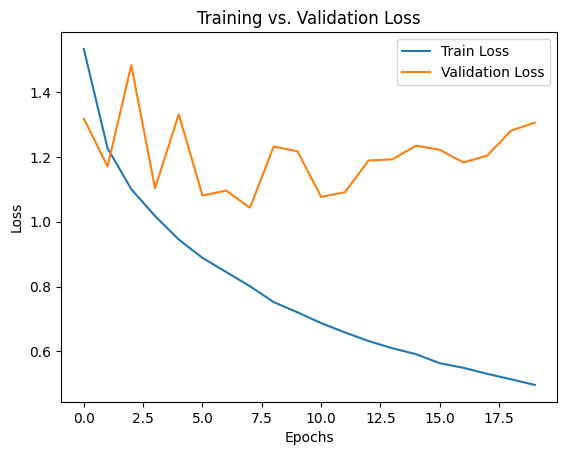

In [ ]:
#Your code here
plt.plot(le_history.history['loss'], label='Train Loss')
plt.plot(le_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()

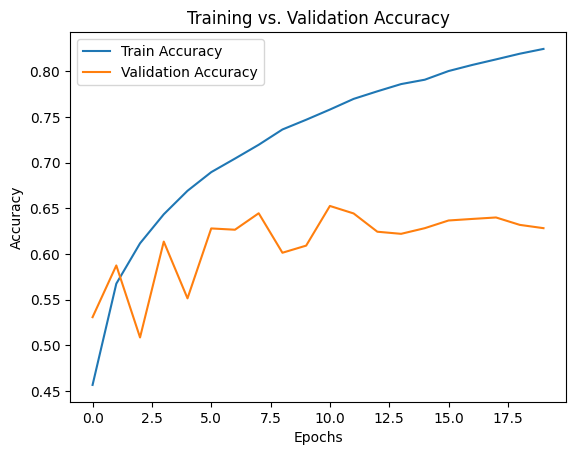

In [ ]:
#Your code here
plt.plot(le_history.history['accuracy'], label='Train Accuracy')
plt.plot(le_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = LeNet5.evaluate(x_test, y_test, verbose=1)
print(test_loss)
print(test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6328 - loss: 1.2781
1.3021185398101807
0.6334999799728394


In [ ]:
#Your comments here
# Batch normalization achieves higher accuracy than both dropout and the base LeNet-5 model. While it has a slightly higher test loss than dropout, batch normalization helps stabilize training by normalizing the inputs to each layer, making the model less sensitive to initialization changes.

# When it comes to overfitting, looking at the plots for training v/s validation loss, it seems that for batch normalization, after the 10th epoch, there is a noticeable and growing divergence between train and validation loss -- a classic case of overfitting. This is not true for dropout, where the divergence is much lesser. Thus, dropout helps more with overfitting but this does not translate into higher accuracy on the test set.